• DOMAIN: Electronics and Telecommunication

• CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

• DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality.

• PROJECT OBJECTIVE: To build a classifier which can use the given parameters to determine the signal strength or quality.

**A. Read the ‘Signals.csv’ as DataFrame and import required libraries.**

In [1]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats


In [2]:
#mount drive into google colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#read the file into google colab
signal=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Deep Learning/NN Project Data - Signal.csv")

In [4]:
#Data Preparation
signal.head()


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
signal.shape

(1599, 12)

In [6]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
signal['Parameter 1'].unique()

array([ 7.4,  7.8, 11.2,  7.9,  7.3,  7.5,  6.7,  5.6,  8.9,  8.5,  8.1,
        7.6,  6.9,  6.3,  7.1,  8.3,  5.2,  5.7,  8.8,  6.8,  4.6,  7.7,
        8.7,  6.4,  6.6,  8.6, 10.2,  7. ,  7.2,  9.3,  8. ,  9.7,  6.2,
        5. ,  4.7,  8.4, 10.1,  9.4,  9. ,  8.2,  6.1,  5.8,  9.2, 11.5,
        5.4,  9.6, 12.8, 11. , 11.6, 12. , 15. , 10.8, 11.1, 10. , 12.5,
       11.8, 10.9, 10.3, 11.4,  9.9, 10.4, 13.3, 10.6,  9.8, 13.4, 10.7,
       11.9, 12.4, 12.2, 13.8,  9.1, 13.5, 10.5, 12.6, 14. , 13.7,  9.5,
       12.7, 12.3, 15.6,  5.3, 11.3, 13. ,  6.5, 12.9, 14.3, 15.5, 11.7,
       13.2, 15.9, 12.1,  5.1,  4.9,  5.9,  6. ,  5.5])

In [8]:
signal['Parameter 2'].unique()

array([0.7  , 0.88 , 0.76 , 0.28 , 0.66 , 0.6  , 0.65 , 0.58 , 0.5  ,
       0.615, 0.61 , 0.62 , 0.56 , 0.59 , 0.32 , 0.22 , 0.39 , 0.43 ,
       0.49 , 0.4  , 0.41 , 0.71 , 0.645, 0.675, 0.685, 0.655, 0.605,
       0.38 , 1.13 , 0.45 , 0.67 , 0.52 , 0.935, 0.29 , 0.31 , 0.51 ,
       0.42 , 0.63 , 0.69 , 0.735, 0.725, 0.705, 0.785, 0.75 , 0.625,
       0.3  , 0.55 , 1.02 , 0.775, 0.9  , 0.545, 0.575, 0.33 , 0.54 ,
       1.07 , 0.695, 1.33 , 0.745, 1.04 , 0.715, 0.415, 0.34 , 0.68 ,
       0.95 , 0.53 , 0.64 , 0.885, 0.805, 0.73 , 0.37 , 0.835, 1.09 ,
       0.57 , 0.44 , 0.635, 0.82 , 0.48 , 1.   , 0.21 , 0.35 , 0.975,
       0.26 , 0.87 , 0.18 , 0.27 , 0.2  , 0.36 , 0.83 , 0.46 , 0.47 ,
       0.77 , 0.815, 0.795, 0.665, 0.765, 0.24 , 0.85 , 0.84 , 0.96 ,
       0.78 , 0.23 , 0.315, 0.365, 0.25 , 0.825, 0.72 , 0.595, 0.585,
       0.915, 0.755, 0.845, 1.24 , 0.8  , 0.98 , 1.185, 0.92 , 1.035,
       1.025, 0.565, 0.74 , 1.115, 0.865, 0.875, 0.965, 0.91 , 0.89 ,
       1.01 , 0.305,

In [9]:
signal['Parameter 3'].unique()

array([0.  , 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29, 0.18, 0.19, 0.28,
       0.51, 0.48, 0.31, 0.21, 0.11, 0.14, 0.16, 0.24, 0.07, 0.12, 0.25,
       0.09, 0.3 , 0.2 , 0.22, 0.15, 0.43, 0.52, 0.23, 0.37, 0.26, 0.57,
       0.4 , 0.49, 0.05, 0.54, 0.64, 0.7 , 0.47, 0.44, 0.17, 0.68, 0.53,
       0.1 , 0.01, 0.55, 1.  , 0.03, 0.42, 0.33, 0.32, 0.35, 0.6 , 0.74,
       0.58, 0.5 , 0.76, 0.46, 0.45, 0.38, 0.39, 0.66, 0.62, 0.67, 0.79,
       0.63, 0.61, 0.71, 0.65, 0.59, 0.34, 0.69, 0.73, 0.72, 0.41, 0.27,
       0.75, 0.13, 0.78])

In [10]:
signal['Parameter 4'].unique()

array([ 1.9 ,  2.6 ,  2.3 ,  1.8 ,  1.6 ,  1.2 ,  2.  ,  6.1 ,  3.8 ,
        3.9 ,  1.7 ,  4.4 ,  2.4 ,  1.4 ,  2.5 , 10.7 ,  5.5 ,  2.1 ,
        1.5 ,  5.9 ,  2.8 ,  2.2 ,  3.  ,  3.4 ,  5.1 ,  4.65,  1.3 ,
        7.3 ,  7.2 ,  2.9 ,  2.7 ,  5.6 ,  3.1 ,  3.2 ,  3.3 ,  3.6 ,
        4.  ,  7.  ,  6.4 ,  3.5 , 11.  ,  3.65,  4.5 ,  4.8 ,  2.95,
        5.8 ,  6.2 ,  4.2 ,  7.9 ,  3.7 ,  6.7 ,  6.6 ,  2.15,  5.2 ,
        2.55, 15.5 ,  4.1 ,  8.3 ,  6.55,  4.6 ,  4.3 ,  5.15,  6.3 ,
        6.  ,  8.6 ,  7.5 ,  2.25,  4.25,  2.85,  3.45,  2.35,  2.65,
        9.  ,  8.8 ,  5.  ,  1.65,  2.05,  0.9 ,  8.9 ,  8.1 ,  4.7 ,
        1.75,  7.8 , 12.9 , 13.4 ,  5.4 , 15.4 ,  3.75, 13.8 ,  5.7 ,
       13.9 ])

In [11]:
signal['Parameter 5'].unique()

array([0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.073, 0.071, 0.097,
       0.089, 0.114, 0.176, 0.17 , 0.368, 0.086, 0.341, 0.077, 0.082,
       0.106, 0.084, 0.085, 0.08 , 0.105, 0.083, 0.103, 0.066, 0.172,
       0.074, 0.088, 0.332, 0.05 , 0.054, 0.113, 0.068, 0.081, 0.11 ,
       0.07 , 0.111, 0.079, 0.115, 0.094, 0.093, 0.104, 0.464, 0.401,
       0.062, 0.107, 0.045, 0.058, 0.102, 0.467, 0.091, 0.122, 0.09 ,
       0.119, 0.178, 0.146, 0.072, 0.118, 0.049, 0.06 , 0.117, 0.087,
       0.236, 0.61 , 0.095, 0.1  , 0.36 , 0.067, 0.27 , 0.099, 0.046,
       0.061, 0.056, 0.039, 0.059, 0.101, 0.057, 0.337, 0.078, 0.263,
       0.063, 0.611, 0.064, 0.096, 0.358, 0.343, 0.186, 0.112, 0.213,
       0.214, 0.121, 0.128, 0.052, 0.12 , 0.116, 0.109, 0.159, 0.124,
       0.174, 0.047, 0.127, 0.413, 0.152, 0.053, 0.055, 0.051, 0.125,
       0.2  , 0.171, 0.226, 0.25 , 0.108, 0.148, 0.143, 0.222, 0.157,
       0.422, 0.034, 0.387, 0.415, 0.243, 0.241, 0.19 , 0.132, 0.126,
       0.038, 0.044,

In [12]:
signal['Parameter 6'].unique()

array([11. , 25. , 15. , 17. , 13. ,  9. , 16. , 52. , 51. , 35. ,  6. ,
       29. , 23. , 10. , 21. ,  4. , 14. ,  8. , 22. , 40. ,  5. ,  3. ,
        7. , 12. , 30. , 33. , 50. , 19. , 20. , 27. , 18. , 28. , 34. ,
       42. , 41. , 37. , 32. , 36. , 24. , 26. , 39. , 40.5, 68. , 31. ,
       38. , 43. , 47. ,  1. , 54. , 46. , 45. ,  2. ,  5.5, 53. , 37.5,
       57. , 48. , 72. , 55. , 66. ])

In [13]:
signal['Parameter 7'].unique()

array([ 34. ,  67. ,  54. ,  60. ,  40. ,  59. ,  21. ,  18. , 102. ,
        65. ,  29. , 145. , 148. , 103. ,  56. ,  71. ,  37. ,  23. ,
        11. ,  35. ,  16. ,  82. , 113. ,  83. ,  50. ,  15. ,  30. ,
        19. ,  87. ,  46. ,  14. , 114. ,  12. ,  96. , 119. ,  73. ,
        45. ,  10. , 110. ,  52. , 112. ,  39. ,  27. ,  94. ,  43. ,
        42. ,  80. ,  51. ,  61. , 136. ,  31. , 125. ,  24. , 140. ,
       133. ,  85. , 106. ,  22. ,  36. ,  69. ,  64. , 153. ,  47. ,
       108. , 111. ,  62. ,  28. ,  89. ,  13. ,  90. , 134. ,  99. ,
        26. ,  63. , 105. ,  20. , 141. ,  88. , 129. , 128. ,  86. ,
       121. , 101. ,  44. ,   8. ,  49. ,  38. , 143. , 144. , 127. ,
       126. , 120. ,  55. ,  93. ,  95. ,  41. ,  58. ,  72. ,  81. ,
       109. ,  33. ,  53. ,  98. ,  48. ,  70. ,  25. , 135. ,  92. ,
        74. ,  32. ,  77. , 165. ,  75. , 124. ,  78. , 122. ,  66. ,
        68. ,  17. ,  91. ,  76. , 151. , 142. , 116. , 149. ,  57. ,
       104. ,  84. ,

In [14]:
signal['Parameter 8'].unique()

array([0.9978 , 0.9968 , 0.997  , 0.998  , 0.9964 , 0.9946 , 0.9959 ,
       0.9943 , 0.9974 , 0.9986 , 0.9969 , 0.9982 , 0.9966 , 0.9955 ,
       0.9962 , 0.9972 , 0.9958 , 0.9993 , 0.9957 , 0.9975 , 0.994  ,
       0.9976 , 0.9934 , 0.9954 , 0.9971 , 0.9956 , 0.9983 , 0.9967 ,
       0.9961 , 0.9984 , 0.9938 , 0.9932 , 0.9965 , 0.9963 , 0.996  ,
       0.9973 , 0.9988 , 0.9937 , 0.9952 , 0.9916 , 0.9944 , 0.9996 ,
       0.995  , 0.9981 , 0.9953 , 0.9924 , 0.9948 , 0.99695, 0.99545,
       0.99615, 0.9994 , 0.99625, 0.99585, 0.99685, 0.99655, 0.99525,
       0.99815, 0.99745, 0.9927 , 0.99675, 0.99925, 0.99565, 1.00005,
       0.9985 , 0.99965, 0.99575, 0.9999 , 1.00025, 0.9987 , 0.99935,
       0.99735, 0.99915, 0.9991 , 1.00015, 0.9997 , 1.001  , 0.9979 ,
       1.0014 , 1.0001 , 0.99855, 0.99845, 0.9998 , 0.99645, 0.99865,
       0.9989 , 0.99975, 0.999  , 1.0015 , 1.0002 , 0.9992 , 1.0008 ,
       1.     , 1.0006 , 1.0004 , 1.0018 , 0.9912 , 1.0022 , 1.0003 ,
       0.9949 , 0.99

In [15]:
signal['Parameter 9'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [16]:
signal['Parameter 10'].unique()

array([0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8 , 0.54, 0.52, 1.56,
       0.88, 0.93, 0.75, 1.28, 0.5 , 1.08, 0.53, 0.91, 0.63, 0.59, 0.55,
       0.66, 0.6 , 0.73, 0.48, 0.83, 0.51, 0.9 , 1.2 , 0.74, 0.64, 0.77,
       0.71, 0.62, 0.39, 0.79, 0.95, 0.82, 1.12, 1.14, 0.78, 1.95, 1.22,
       1.98, 0.61, 1.31, 0.69, 0.67, 0.7 , 0.49, 0.92, 2.  , 0.72, 1.59,
       0.33, 1.02, 0.97, 0.85, 0.43, 1.03, 0.86, 0.76, 1.61, 1.09, 0.84,
       0.96, 0.45, 1.26, 0.87, 0.81, 1.  , 1.36, 1.18, 0.89, 0.98, 1.13,
       1.04, 1.11, 0.99, 1.07, 0.44, 1.06, 1.05, 0.42, 1.17, 1.62, 0.94,
       1.34, 1.16, 1.1 , 0.4 , 1.15, 0.37, 1.33, 1.01])

In [17]:
signal['Parameter 11'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [18]:
signal['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

**B. Check for missing values and print percentage for each attribute.**

In [19]:
signal.isnull().sum()

,0
Parameter 1,0
Parameter 2,0
Parameter 3,0
Parameter 4,0
Parameter 5,0
Parameter 6,0
Parameter 7,0
Parameter 8,0
Parameter 9,0
Parameter 10,0


In [20]:
signal_percentage=(signal.isnull().sum()/len(signal))*100
signal_percentage

,0
Parameter 1,0.0
Parameter 2,0.0
Parameter 3,0.0
Parameter 4,0.0
Parameter 5,0.0
Parameter 6,0.0
Parameter 7,0.0
Parameter 8,0.0
Parameter 9,0.0
Parameter 10,0.0


**C. Check for presence of duplicate records in the dataset and impute with appropriate method.**

In [21]:
signal.duplicated().sum()

240

In [22]:
#Every signal Parameters are important for its unique significance in communication sector, so mean imputation can be done.
signal=signal.groupby(signal.columns.tolist(), as_index=False).mean()

In [23]:
signal.duplicated().sum()

0

**D. Visualise distribution of the target variable.**

<Axes: xlabel='Signal_Strength', ylabel='Count'>

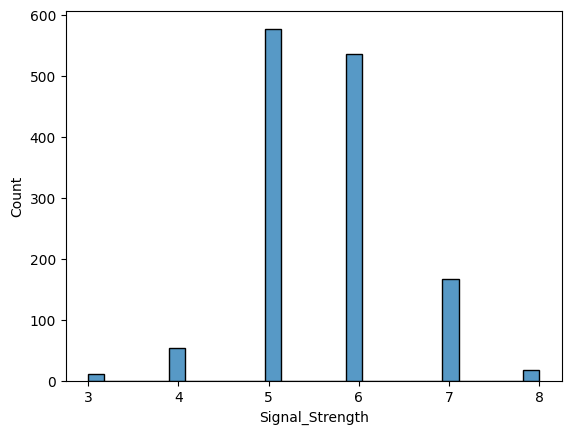

In [24]:
sns.histplot(data=signal, x='Signal_Strength')

**E. Share insights from the initial data analysis**.

Insights:

The dataset has no missing values.

Signal have duplicated parameters. Although they have duplicated values, considering to drop them would result in losing of valuable information from each signals. Also, to note that repitative parameters in signal indicates a certain pattern, trend that can be useful for studies/analysis.

When looked at the target variable it has a multi class classification signal strength and also majority of the strength is in class 5 and 6, indicating imbalance in the dataset.


## **2. Data preprocessing**

**A. Split the data into X & Y.**

In [25]:
X=signal.iloc[:, :-1] # except last column
Y=signal.iloc[:, -1]

In [26]:
X.shape, Y.shape

((1359, 11), (1359,))

In [27]:
Y.value_counts()

,count
Signal_Strength,
5,577
6,535
7,167
4,53
8,17
3,10


**B. Split the data into train & test with 70:30 proportion.**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test= train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=7)

**C. Print shape of all the 4 variables and verify if train and test data is in sync.**

In [29]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(951, 11)
(951,)
(408, 11)
(408,)


**D. Normalise the train and test data with appropriate method.**

In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [31]:
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [32]:
Y_train=Y_train.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)


**E. Transform Labels into format acceptable by Neural Network**

In [33]:
#using onehot encoding to convert mutli class classification into new binary column (eg: 3 is set to 1 at the third new binary column )
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
Y_train_encoded=encoder.fit_transform(Y_train).toarray()
Y_test_encoded=encoder.transform(Y_test).toarray()

In [34]:
print(type(Y_train_encoded))
print(Y_train_encoded[:10])

<class 'numpy.ndarray'>
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [35]:
Y_train_encoded.shape, Y_test_encoded.shape

((951, 6), (408, 6))

## **3. Model Training & Evaluation using Neural Network**

**A. Design a Neural Network to train a classifier.**

In [36]:
# import package to build the neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [37]:
backend.clear_session() # makes sure any previous models, layers, variable remove, will allow it to start from fresh.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


In [38]:
model=Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) # input layer
model.add(Dense(64, activation='relu')) #1st hidden layer
model.add(Dense(32, activation='relu'))  # 2nd hidden layer
model.add(Dense(6, activation='softmax')) # output layer # softmax as it is multi-class-classification with 6 classes(3,4,5,6,7,8)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
#model compiling
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,070 (47.15 KB)

 Trainable params: 12,070 (47.15 KB)

 Non-trainable params: 0 (0.00 B)

**B. Train the classifier using previously designed Architecture**

In [41]:
history=model.fit(X_train_scaled, Y_train_encoded, epochs=30, batch_size=32, validation_split=0.2, verbose=1 )

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 294ms/step - accuracy: 0.3867 - loss: 1.6241 - val_accuracy: 0.5707 - val_loss: 1.2747
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5404 - loss: 1.2017 - val_accuracy: 0.5654 - val_loss: 1.1147
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5700 - loss: 1.0787 - val_accuracy: 0.6073 - val_loss: 1.0426
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5910 - loss: 1.0259 - val_accuracy: 0.6230 - val_loss: 1.0136
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6009 - loss: 0.9931 - val_accuracy: 0.6178 - val_loss: 0.9959
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6128 - loss: 0.9691 - val_accuracy: 0.6073 - val_loss: 0.9844
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6208 - loss: 0.9492 - val_accuracy: 0.6021 - val_loss: 0.9764
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6322 - loss: 0.9305 - val_accuracy: 0.5969 - val_lo

In [42]:
#results
results=model.evaluate(X_test_scaled, Y_test_encoded)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6051 - loss: 1.2343


**C. Plot 2 separate visuals.**

i. Training Loss and Validation Loss

ii. Training Accuracy and Validation Accuracy

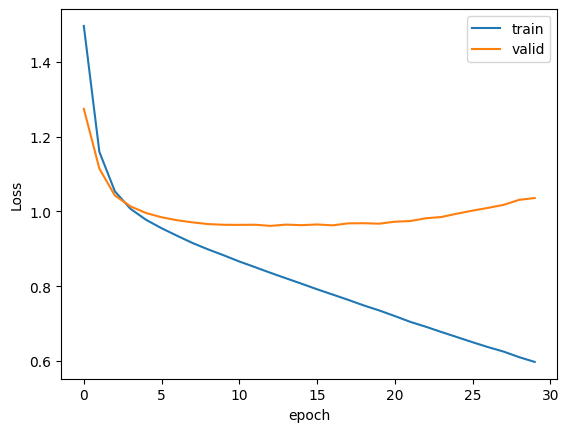

In [43]:
#capturing learning details per epoch
result=pd. DataFrame(history.history)
result['epoch']=history.epoch

# plotting Training loss and Validation loss
plt.plot(result['loss'])
plt.plot(result['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(("train", "valid"), loc=0)

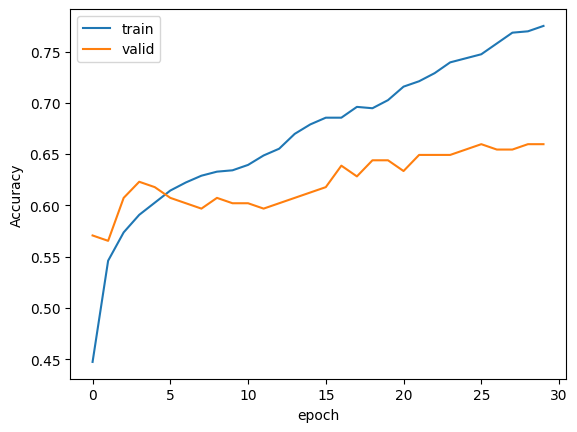

In [44]:
# plotting Training accuracy and Validation accuracy
plt.plot(result['accuracy'])
plt.plot(result['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(("train", "valid"), loc=0)

The model is built using simple neural network with 2 hidden layers and activation function relu at the (I/P, hidden layers), and softmax at the O/P layer as it is a multi class classification problem.

on training the model, the model loss on train and validation is not converging and the validation loss seems to increase than the train. Also the accuracy of train and the validation is at 77% and 65%. on the test data the accuracy is at 60% approximately.

We can see a trend on validation data, the increase in loss is decreasing the accuracy.

We can consider updating the exisiting model including dropout, batchnormalization, initializers.

**D. Design new architecture/update existing architecture in attempt to improve the performance of the model.**

**E. Plot visuals as in Q3.C and share insights about difference observed in both the models.**

**Updating the existing model with initializer and LeakyReLU**

In [45]:
from tensorflow.keras.layers import LeakyReLU

In [46]:
modela=Sequential()
# input layer
modela.add(Dense(128, activation='relu', kernel_initializer='normal', input_shape=(X_train.shape[1],)))
#1st hidden layer
modela.add(Dense(64, kernel_initializer='normal'))
modela.add(LeakyReLU(alpha=0.1))
# 2nd hidden layer
modela.add(Dense(32, kernel_initializer='normal'))
modela.add(LeakyReLU(alpha=0.1))
# output layer
modela.add(Dense(6, activation='softmax'))  # softmax as it is multi-class-classification with 6 classes(3,4,5,6,7,8)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [47]:
#model compiling
modela.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modela.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,070 (47.15 KB)

 Trainable params: 12,070 (47.15 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
historya=modela.fit(X_train_scaled, Y_train_encoded, epochs=30, batch_size=32, validation_split=0.2, verbose=1 )

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.3835 - loss: 1.7061 - val_accuracy: 0.4607 - val_loss: 1.3328
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4168 - loss: 1.2930 - val_accuracy: 0.5550 - val_loss: 1.1344
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5553 - loss: 1.1333 - val_accuracy: 0.6021 - val_loss: 1.0208
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5777 - loss: 1.0560 - val_accuracy: 0.6283 - val_loss: 0.9698
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5692 - loss: 1.0219 - val_accuracy: 0.6335 - val_loss: 0.9508
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5818 - loss: 1.0010 - val_accuracy: 0.6126 - val_loss: 0.9384
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5922 - loss: 0.9842 - val_accuracy: 0.6230 - val_loss: 0.9290
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5911 - loss: 0.9688 - val_accuracy: 0.6178 - val_los

In [49]:
#results
resultsa=modela.evaluate(X_test_scaled, Y_test_encoded)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5754 - loss: 1.0461


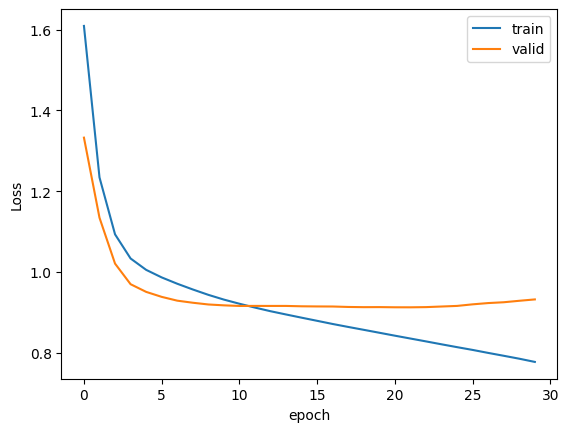

In [50]:
#capturing learning details per epoch
resulta=pd. DataFrame(historya.history)
resulta['epoch']=historya.epoch

# plotting Training loss and Validation loss
plt.plot(resulta['loss'])
plt.plot(resulta['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(("train", "valid"), loc=0)

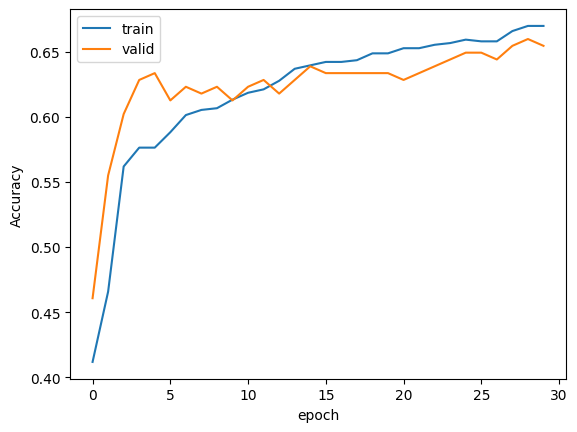

In [51]:
# plotting Training accuracy and Validation accuracy
plt.plot(resulta['accuracy'])
plt.plot(resulta['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(("train", "valid"), loc=0)

On updating the previous model with kernel initializer=normal and introducing the leakyrelu with alpha 0.01, the model seems to converge better at the train and validation data. The train and validation loss as seen from graph also from the model.fit is seen to be between 0.80 and 0.90. The Accuracy at the train is 66% and validation is 65% which seems to be a good model for further studies. Also, it did decent in the test data at the accuracy of 58% approximately.

**NEW-MODEL1 WITH KERNEL_INITILIZATION**

In [52]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [53]:
model1=Sequential()
# input layer
model1.add(Dense(64, activation='relu', kernel_initializer='he_uniform', input_shape=(X_train.shape[1],)))
model1.add(Dense(32, activation='relu', kernel_initializer='he_uniform')) #1st hidden layer

model1.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))  # 2nd hidden layer

model1.add(Dense(6, activation='softmax')) # output layer # softmax as it is multi-class-classification with 6 classes(3,4,5,6,7,8)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
#model compiling
model1.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,478 (13.59 KB)

 Trainable params: 3,478 (13.59 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history1=model1.fit(X_train_scaled, Y_train_encoded, epochs=30, batch_size=32, validation_split=0.2, verbose=1 )

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - accuracy: 0.0678 - loss: 2.2752 - val_accuracy: 0.3665 - val_loss: 1.5840
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3764 - loss: 1.5672 - val_accuracy: 0.4921 - val_loss: 1.3597
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4626 - loss: 1.3303 - val_accuracy: 0.5236 - val_loss: 1.2052
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5274 - loss: 1.1831 - val_accuracy: 0.5707 - val_loss: 1.1355
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5363 - loss: 1.1222 - val_accuracy: 0.5707 - val_loss: 1.1022
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5559 - loss: 1.0841 - val_accuracy: 0.5707 - val_loss: 1.0700
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5809 - loss: 1.0561 - val_accuracy: 0.5707 - val_loss: 1.0555
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5759 - loss: 1.0312 - val_accuracy: 0.5707 - val_los

In [57]:
#results
results1=model1.evaluate(X_test_scaled, Y_test_encoded)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5833 - loss: 1.0695


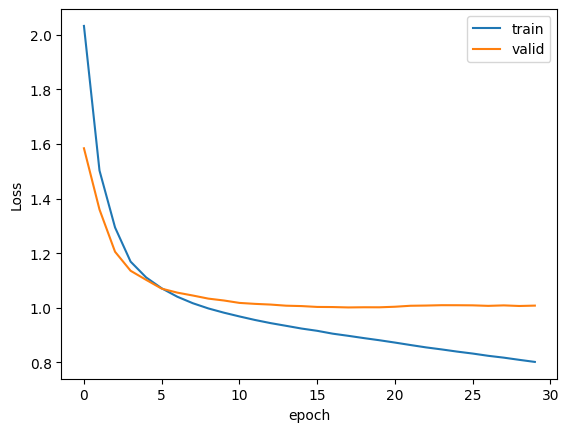

In [58]:
#capturing learning details per epoch
result1=pd.DataFrame(history1.history)
result1['epoch']=history1.epoch

# plotting Training loss and Validation loss
plt.plot(result1['loss'])
plt.plot(result1['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(("train", "valid"), loc=0)

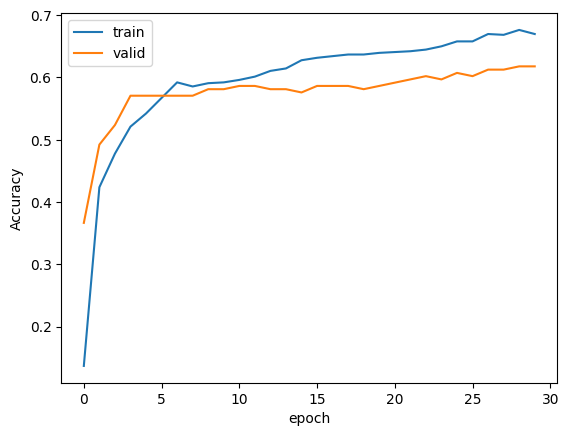

In [59]:
# plotting Training accuracy and Validation accuracy
plt.plot(result1['accuracy'])
plt.plot(result1['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(("train", "valid"), loc=0)

A new neural network was built to check for better model performance as the accuracy still is at 60% approximately. Here for this model kernel_initializer= he_uniform is used with two hidden layers with 32, 16 nodes each. The I/P layer has 64 nodes. From the graph it looks that same as the previous model even this model performed the same and no much much difference is seen.

**MODEL2 WITH BATCHNORMALIZATION**

In [60]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

model2=Sequential()
# input layer
model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(BatchNormalization())
model2.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))#1st hidden layer
model2.add(BatchNormalization())
model2.add(Dense(16, activation='relu', kernel_initializer='he_uniform')) #2st hidden layer
model2.add(Dense(6, activation='softmax')) # output layer # softmax as it is multi-class-classification with 6 classes(3,4,5,6,7,8)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
#model compiling
model2.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])


model2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,862 (15.09 KB)

 Trainable params: 3,670 (14.34 KB)

 Non-trainable params: 192 (768.00 B)

In [62]:
history2=model2.fit(X_train_scaled, Y_train_encoded, epochs=30, batch_size=32, validation_split=0.2, verbose=1 )

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.0921 - loss: 2.4866 - val_accuracy: 0.3455 - val_loss: 1.7017
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2963 - loss: 1.7178 - val_accuracy: 0.5079 - val_loss: 1.4871
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4624 - loss: 1.3975 - val_accuracy: 0.5812 - val_loss: 1.3513
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5485 - loss: 1.2298 - val_accuracy: 0.5759 - val_loss: 1.2543
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5944 - loss: 1.1252 - val_accuracy: 0.5812 - val_loss: 1.1825
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6208 - loss: 1.0548 - val_accuracy: 0.5916 - val_loss: 1.1302
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6259 - loss: 1.0015 - val_accuracy: 0.5969 - val_loss: 1.0907
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6343 - loss: 0.9604 - val_accuracy: 0.6073 - val_los

In [63]:
#results
results2=model2.evaluate(X_test_scaled, Y_test_encoded)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5958 - loss: 1.2359


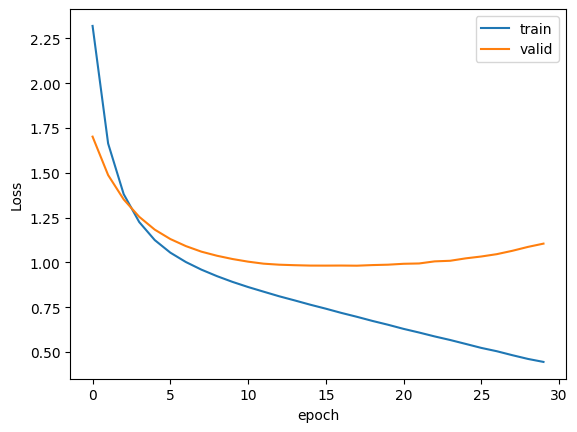

In [64]:
#capturing learning details per epoch
result2=pd.DataFrame(history2.history)
result2['epoch']=history2.epoch

# plotting Training loss and Validation loss
plt.plot(result2['loss'])
plt.plot(result2['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(("train", "valid"), loc=0)


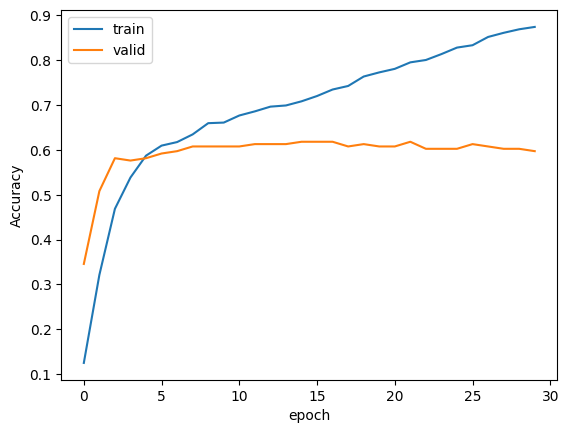

In [65]:
# plotting Training accuracy and Validation accuracy
plt.plot(result2['accuracy'])
plt.plot(result2['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(("train", "valid"), loc=0)

**MODEL3 DROPOUT**

In [66]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

model3=Sequential()
# input layer
model3.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())
model3.add(Dense(32, activation='relu', kernel_initializer='he_uniform')) #1st hidden layer
model3.add(Dropout(0.5))
model3.add(BatchNormalization())
model3.add(Dense(16, activation='relu', kernel_initializer='he_uniform')) #2nd hidden layer
model3.add(Dense(6, activation='softmax')) # output layer # softmax as it is multi-class-classification with 6 classes(3,4,5,6,7,8)






/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
#model compiling
model3.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,862 (15.09 KB)

 Trainable params: 3,670 (14.34 KB)

 Non-trainable params: 192 (768.00 B)

In [68]:
history3=model3.fit(X_train_scaled, Y_train_encoded, epochs=30, batch_size=32, validation_split=0.2, verbose=1 )



Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.1274 - loss: 2.3561 - val_accuracy: 0.2461 - val_loss: 1.7065
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1652 - loss: 1.9970 - val_accuracy: 0.2984 - val_loss: 1.6426
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2560 - loss: 1.7363 - val_accuracy: 0.4555 - val_loss: 1.5737
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3102 - loss: 1.5998 - val_accuracy: 0.5183 - val_loss: 1.5086
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3715 - loss: 1.4947 - val_accuracy: 0.5079 - val_loss: 1.4402
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4056 - loss: 1.4335 - val_accuracy: 0.5079 - val_loss: 1.3752
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4219 - loss: 1.3803 - val_accuracy: 0.4974 - val_loss: 1.3188
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4795 - loss: 1.3380 - val_accuracy: 0.4921 - val_los

In [69]:
#results
results3=model3.evaluate(X_test_scaled, Y_test_encoded)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5789 - loss: 0.9998


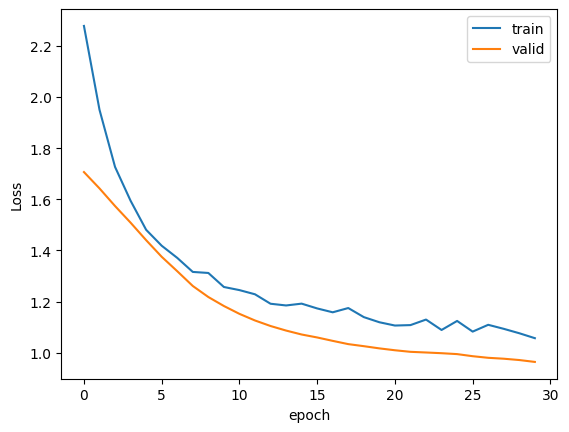

In [70]:
#capturing learning details per epoch
result3=pd.DataFrame(history3.history)
result3['epoch']=history3.epoch

# plotting Training loss and Validation loss
plt.plot(result3['loss'])
plt.plot(result3['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(("train", "valid"), loc=0)

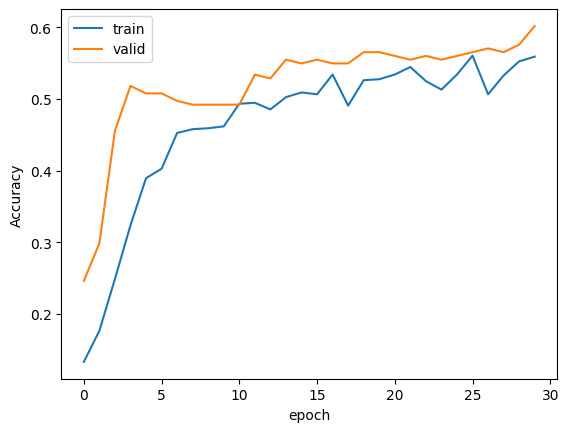

In [71]:
# plotting Training accuracy and Validation accuracy
plt.plot(result3['accuracy'])
plt.plot(result3['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(("train", "valid"), loc=0)

The models, with batch normalization inclusion and Dropout didnot converge much on training and validation and loss is more, although accuracy is somewhere around 56-59%. The model performed well without inclusion of these.


Takeways: The model with inclusion of Kernel initializers with normal and he_uniform performed well and is the suited model for this dataset. Although it didnt perform the best seeing the accuracy it has. Model can be imporved may be including more hidden layers and doing model tuning.

